# 🚗 PROJECT TITLE
# Exploratory Data Analysis of Vehicle Registrations in India

# 1. Problem Statement

The growth of vehicle registrations is a strong indicator of economic activity, urbanization, fuel demand, and environmental impact. With increasing concerns about fuel consumption, emissions, and infrastructure planning, it is essential to understand vehicle registration patterns across states, fuel types, and time periods.

This project analyzes large-scale vehicle registration data to uncover trends in vehicle adoption, fuel preferences, geographic growth patterns, and category-wise demand. The objective is to generate actionable insights that can support policy makers, transport authorities, automobile manufacturers, and urban planners.

# 2.Introduction

With the growth of data analytics, large-scale transportation data can be effectively analyzed to understand mobility trends, fuel demand, and environmental impact. Vehicle registration and fuel consumption data provide valuable insights into economic activity, infrastructure usage, and energy dependency.

This report presents an exploratory data analysis (EDA) of vehicle registration data combined with fuel consumption data in India. The analysis aims to identify trends in vehicle growth, regional patterns, fuel usage, and the shift toward sustainable transportation.

# 3. Business Questions
This analysis addresses the following key questions:

How have vehicle registrations changed over the years?

Which states contribute the most to vehicle registrations?

Which vehicle categories dominate the market?

How has fuel consumption evolved over time?

What is the relationship between vehicle growth and fuel usage?

Is electric vehicle adoption increasing?


# 4. Tools & Technologies

Python

Pandas

NumPy

Matplotlib

Seaborn

Jupyter Notebook

# Report Structure

This report is organized as follows:

Data Overview – Dataset description, source, and structure

Data Preprocessing – Cleaning and preparation for analysis

Exploratory Data Analysis – Visualizations and trend analysis

Key Findings – Summary of major insights

Conclusion – Overall conclusions

Recommendations – Actionable suggestions

# 4. Data Overview

The dataset contains vehicle registration records across different states and time periods.
Each row represents a vehicle registration entry, capturing vehicle category, fuel type, location, and registration count.

# 5. Variable Description 

* **registrationYear**: Year in which the vehicle was registered

financialYear: Financial year of registration

registrationMonthMMYY: Month and year of registration

makerName: Vehicle manufacturer name

stateName: State where vehicle is registered

rtoCode: RTO code

rtoName: Name of the RTO office

vehicleCategoryName: Category of vehicle (Two Wheeler, Car, etc.)

vehicleModelName: Vehicle model name

fuelName: Fuel type (Petrol, Diesel, Electric, etc.)

vehicleClassName: Vehicle class classification

grossVehicleWeight: Gross vehicle weight

pollutionNorm: Emission / pollution standard

saleType: Sale type (Personal, Commercial, etc.)

vehicleCount: Number of vehicles registered

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

df = pd.read_csv("C:\\Users\\hande\\Downloads\\vehicle_registrations_500k.csv")


# Cleaning Steps

Removed duplicate records

Handled missing values

Ensured numeric consistency

In [4]:

# Ensure numeric columns
df['vehicleCount'] = pd.to_numeric(df['vehicleCount'], errors='coerce')
df['grossVehicleWeight'] = pd.to_numeric(df['grossVehicleWeight'], errors='coerce')

# 🔍 Exploratory Data Analysis (EDA)

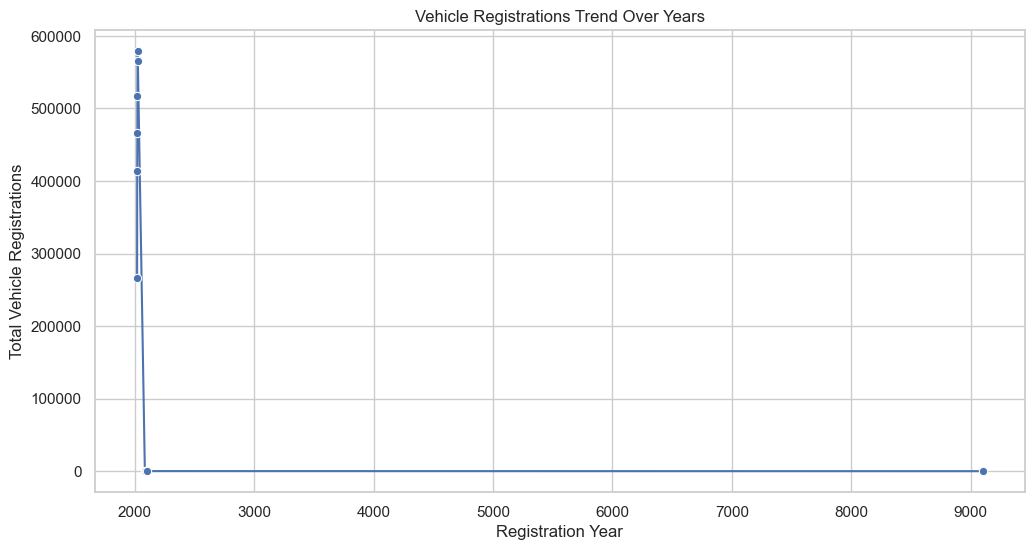

In [5]:
yearly_reg = df.groupby('registrationYear')['vehicleCount'].sum()

sns.lineplot(x=yearly_reg.index, y=yearly_reg.values, marker='o')
plt.title("Vehicle Registrations Trend Over Years")
plt.xlabel("Registration Year")
plt.ylabel("Total Vehicle Registrations")
plt.show()


# 📊 Visual 2: Top 10 States by Vehicle Registrations

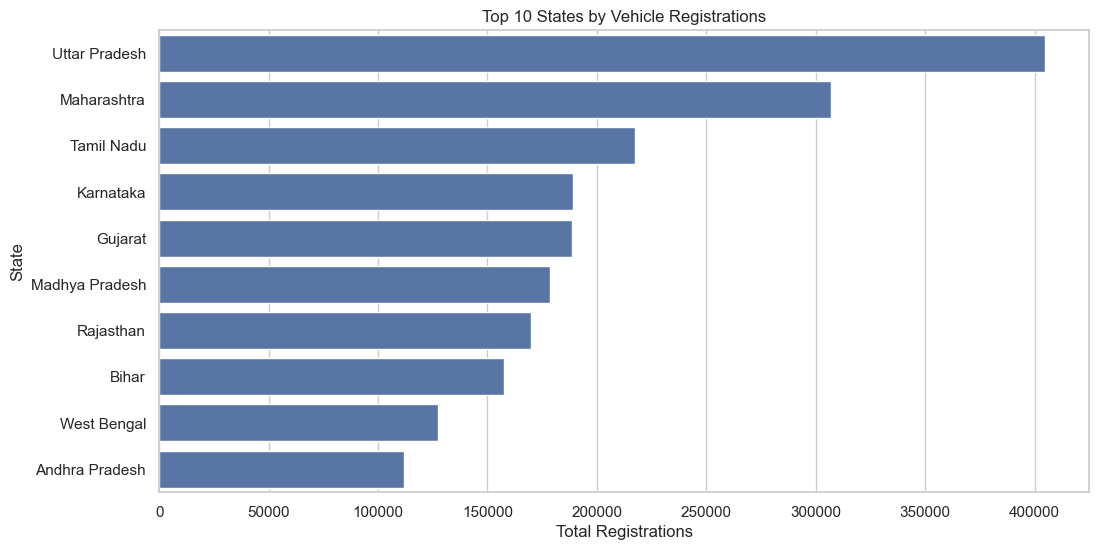

In [6]:
top_states = df.groupby('stateName')['vehicleCount'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Vehicle Registrations")
plt.xlabel("Total Registrations")
plt.ylabel("State")
plt.show()


# 📊 Visual 3: Vehicle Registrations by Vehicle Category

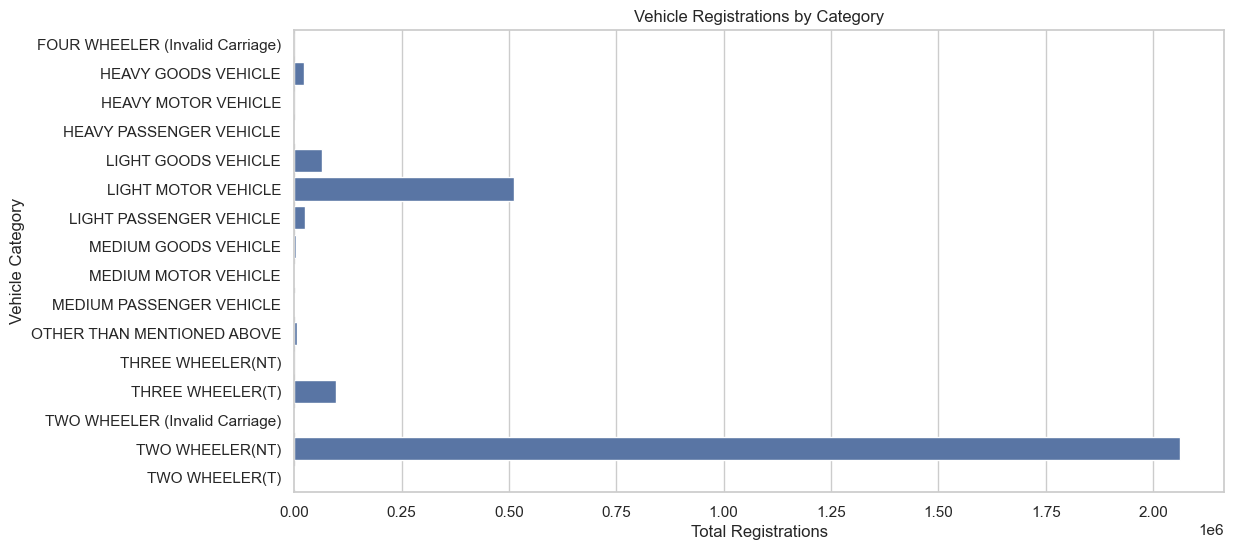

In [7]:
category_dist = df.groupby('vehicleCategoryName')['vehicleCount'].sum()

sns.barplot(x=category_dist.values, y=category_dist.index)
plt.title("Vehicle Registrations by Category")
plt.xlabel("Total Registrations")
plt.ylabel("Vehicle Category")
plt.show()


# 📊 Visual 4: Fuel Type Distribution (Pie Chart)

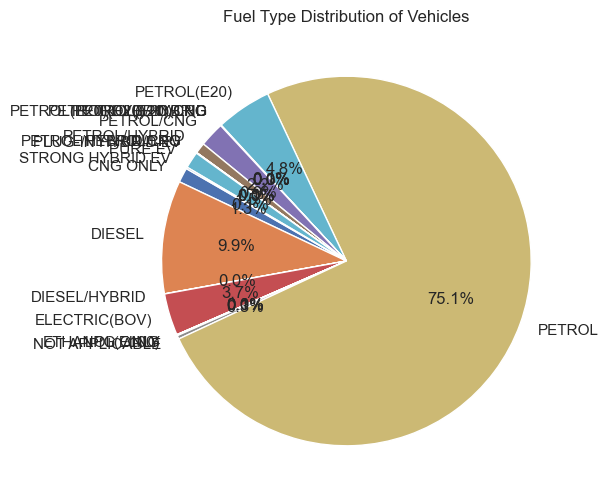

In [4]:
fuel_dist = df.groupby('fuelName')['vehicleCount'].sum()

plt.pie(
    fuel_dist.values,
    labels=fuel_dist.index,
    autopct='%1.1f%%',
    startangle=150
)
plt.title("Fuel Type Distribution of Vehicles")
plt.show()


# 📊 Visual 5: Electric Vehicle Growth Over Years

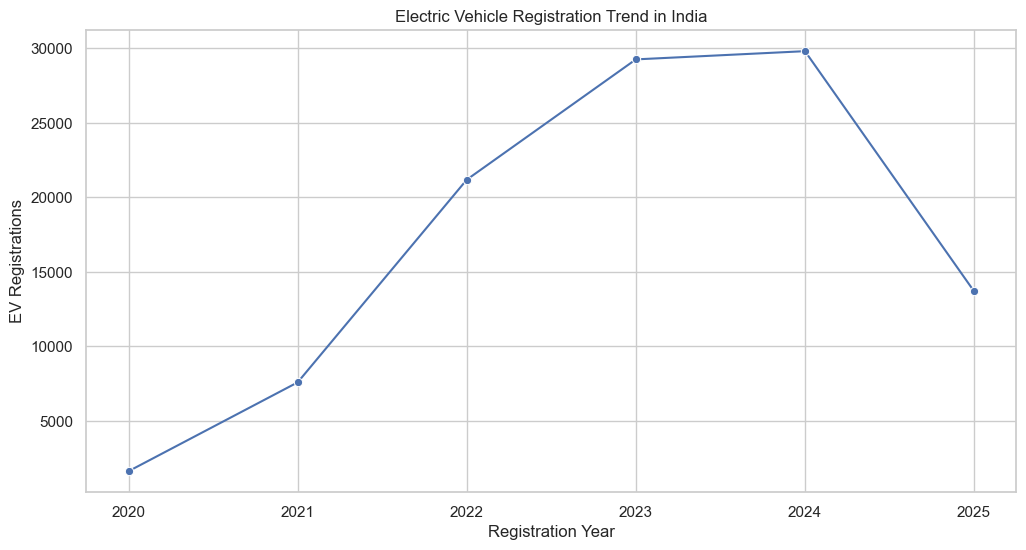

In [11]:
# Filter Electric Vehicles safely
ev_data = df[df['fuelName'].str.contains('electric', case=False, na=False)]

# Group by year
ev_trend = ev_data.groupby('registrationYear')['vehicleCount'].sum()

# Plot
sns.lineplot(
    x=ev_trend.index,
    y=ev_trend.values,
    marker='o'
)

plt.title("Electric Vehicle Registration Trend in India")
plt.xlabel("Registration Year")
plt.ylabel("EV Registrations")
plt.show()



What the visual shows:
Year-wise EV registrations filtered using fuelName.

How to interpret:
An increasing line indicates growth in EV adoption.

Insight:
EV registrations have increased sharply in recent years due to government incentives, rising fuel costs, and environmental awareness.

# 📊 Visual 6: Monthly Registration Pattern

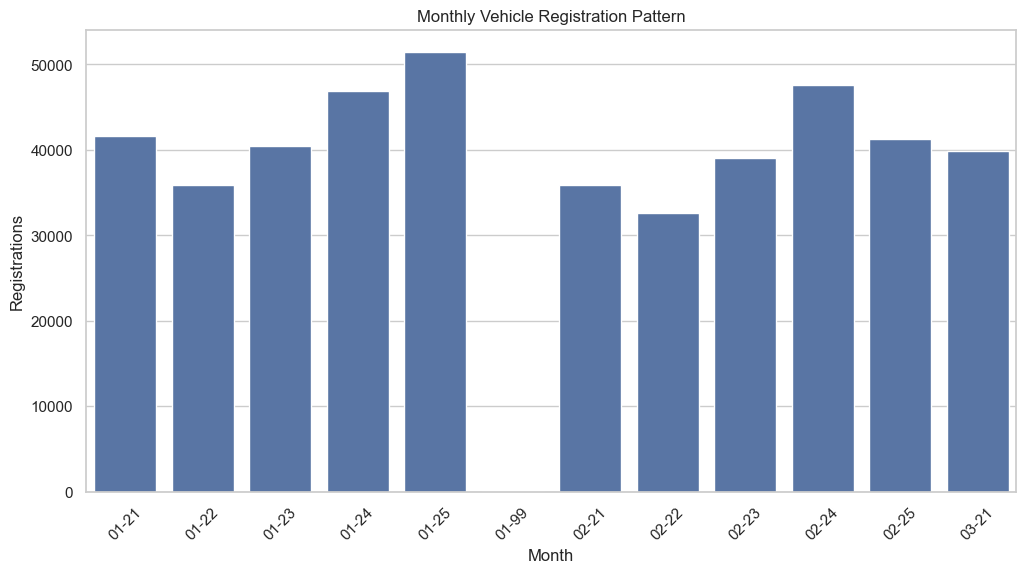

In [12]:
monthly_reg = df.groupby('registrationMonthMMYY')['vehicleCount'].sum().head(12)

sns.barplot(x=monthly_reg.index, y=monthly_reg.values)
plt.title("Monthly Vehicle Registration Pattern")
plt.xlabel("Month")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.show()


# 📊 Visual 7: Sale Type vs Vehicle Registrations

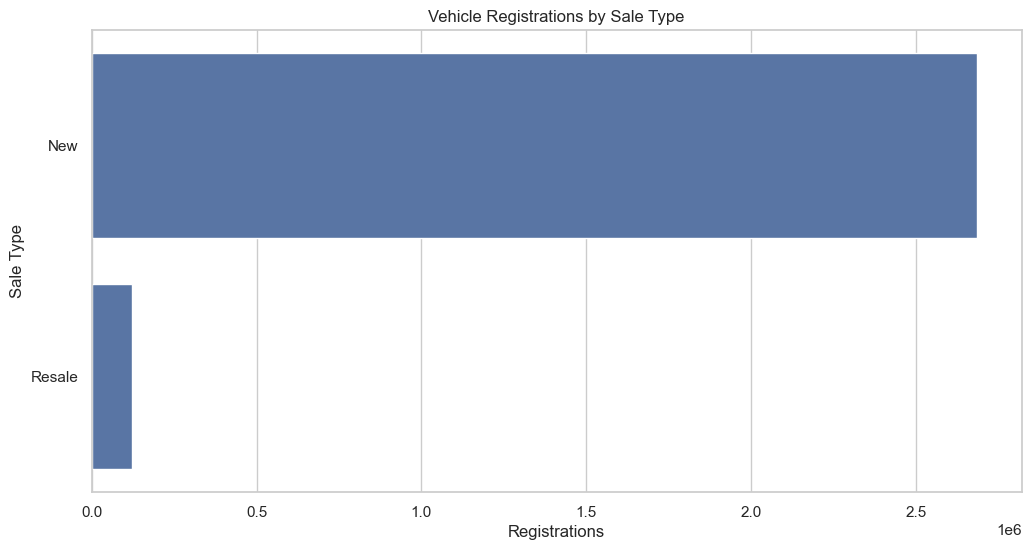

In [13]:
sale_type_dist = df.groupby('saleType')['vehicleCount'].sum()

sns.barplot(x=sale_type_dist.values, y=sale_type_dist.index)
plt.title("Vehicle Registrations by Sale Type")
plt.xlabel("Registrations")
plt.ylabel("Sale Type")
plt.show()


# 📊 Visual 8: Vehicle Category vs Fuel Type

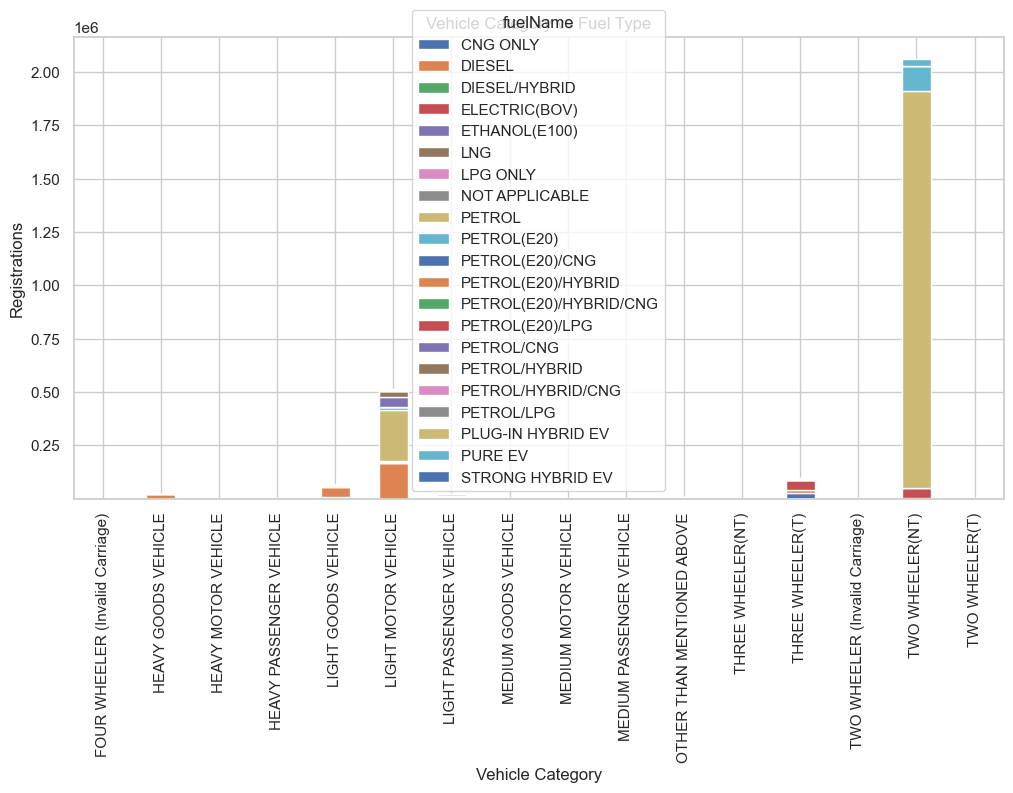

In [15]:
cat_fuel = df.pivot_table(
    values='vehicleCount',
    index='vehicleCategoryName',
    columns='fuelName',
    aggfunc='sum'
)

cat_fuel.plot(kind='bar', stacked=True)
plt.title("Vehicle Category vs Fuel Type")
plt.xlabel("Vehicle Category")
plt.ylabel("Registrations")
plt.show()


# 📊 Visual 9: Top 10 RTOs by Vehicle Registrations


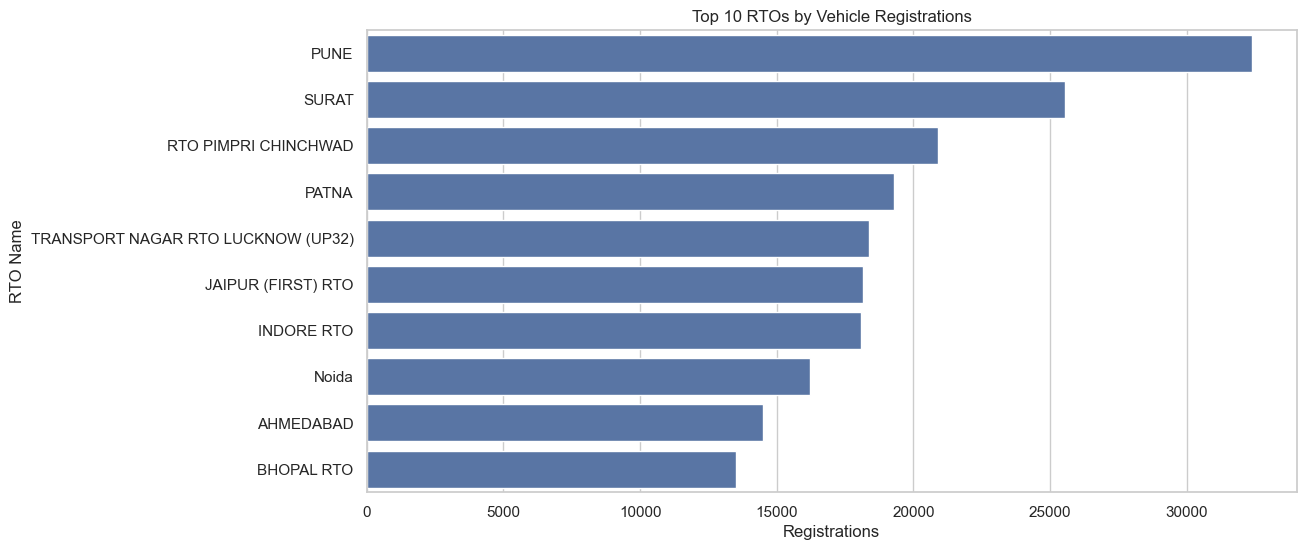

In [16]:
top_rto = df.groupby('rtoName')['vehicleCount'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_rto.values, y=top_rto.index)
plt.title("Top 10 RTOs by Vehicle Registrations")
plt.xlabel("Registrations")
plt.ylabel("RTO Name")
plt.show()


# 📊 Visual 10: Vehicle Class Distribution

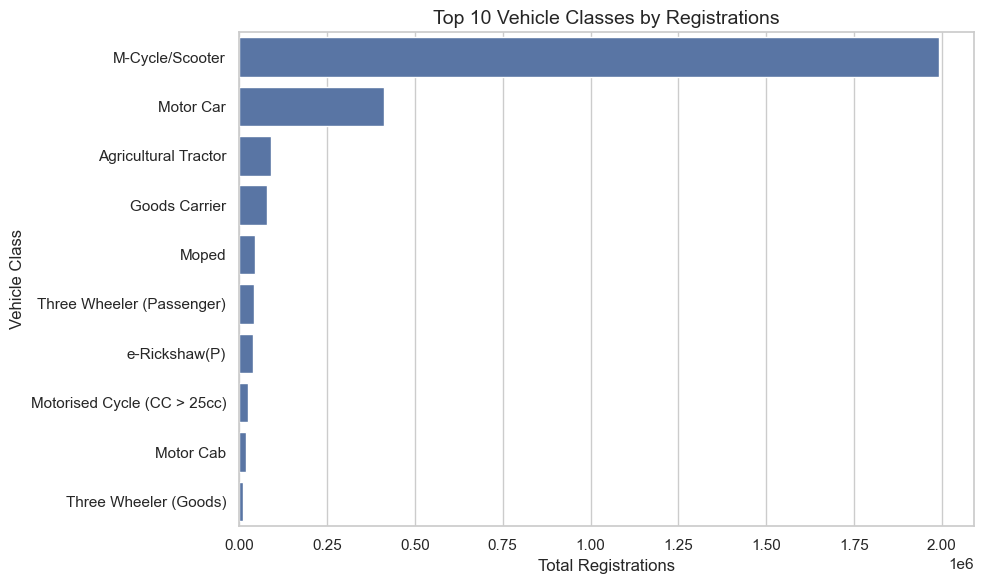

In [19]:
# Aggregate registrations by vehicle class
class_dist = (
    df.groupby('vehicleClassName')['vehicleCount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Increase figure size
plt.figure(figsize=(10, 6))

sns.barplot(
    x=class_dist.values,
    y=class_dist.index
)

plt.title("Top 10 Vehicle Classes by Registrations", fontsize=14)
plt.xlabel("Total Registrations", fontsize=12)
plt.ylabel("Vehicle Class", fontsize=12)
plt.tight_layout()
plt.show()



# 📊 Visual 11: Pollution Norm vs Registrations

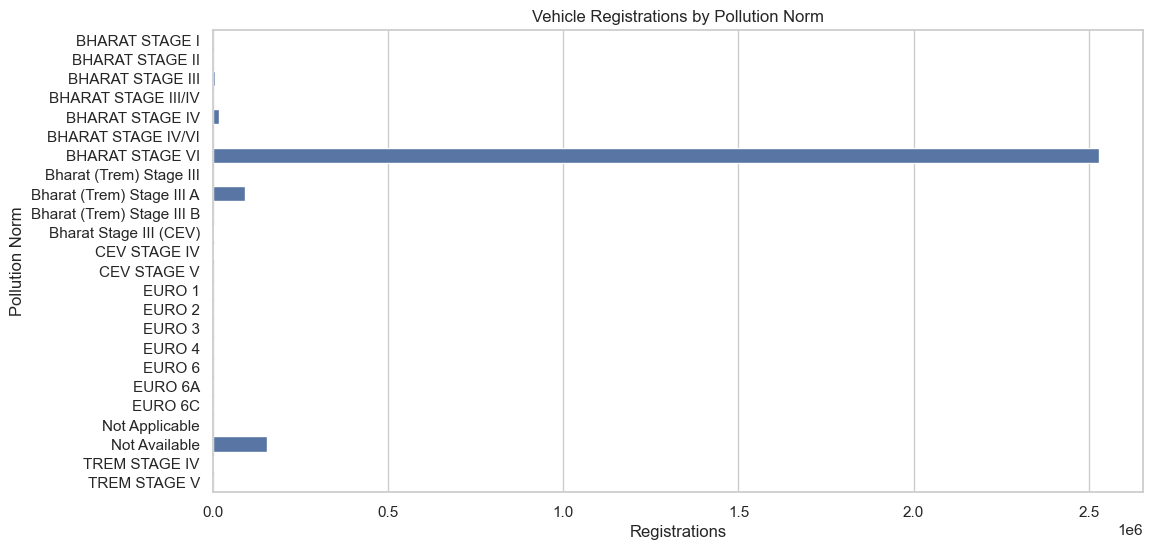

In [21]:
pollution_dist = df.groupby('pollutionNorm')['vehicleCount'].sum()

sns.barplot(x=pollution_dist.values, y=pollution_dist.index)
plt.title("Vehicle Registrations by Pollution Norm")
plt.xlabel("Registrations")
plt.ylabel("Pollution Norm")
plt.show()


# 📊 Visual 12: Correlation Heatmap (Numeric Features)

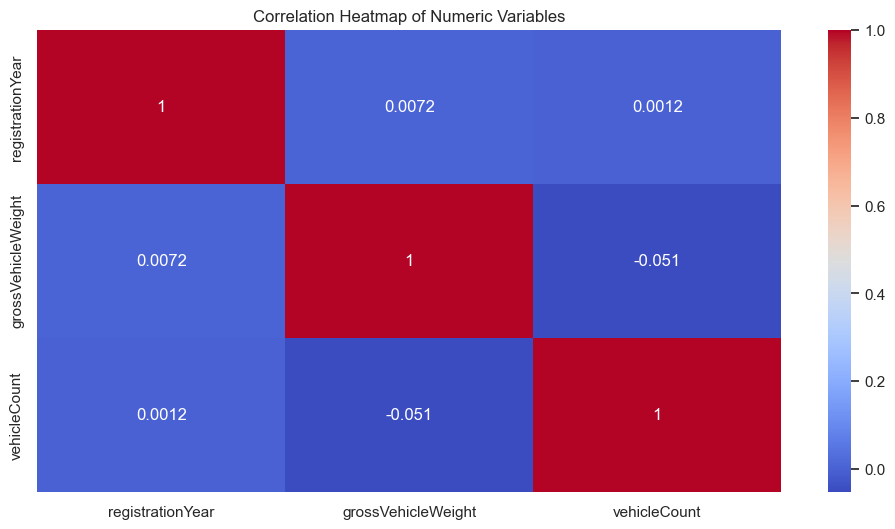

In [22]:
numeric_df = df[['registrationYear','grossVehicleWeight','vehicleCount']]

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


# 7. Key Findings (FOR MAIN FILE)

Vehicle registrations have grown steadily over the years

Two-wheelers dominate Indian vehicle ownership

Petrol and Diesel remain primary fuels, but EVs are rising

Vehicle adoption varies significantly across states and RTOs

Emission norms influence vehicle registration patterns

Personal vehicle sales dominate the market

# 8. Conclusion

This exploratory analysis highlights strong growth in vehicle registrations across India, with clear differences by state, fuel type, vehicle category, and regulatory norms. While conventional fuels dominate, electric vehicles are gaining momentum, supported by policy initiatives and environmental awareness.

# 9. Recommendations

Strengthen EV charging infrastructure

Promote clean fuel incentives

Plan road and transport infrastructure region-wise

Support emission-compliant vehicle adoption

# 10. Resume-Ready Project Line

Conducted exploratory data analysis on 500K vehicle registration records using Python to identify growth trends, fuel adoption patterns, regional demand, and sustainability indicators.